# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
mouse_count = len(mouse_study["Mouse ID"].unique())
mouse_count

249

In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_data = mouse_study.set_index("Mouse ID")
unique_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
unique_data.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate_drop = unique_data.drop(["g989"])
clean_duplicate_drop

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate_drop = unique_data.drop(["g989"])
clean_duplicate_drop

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [49]:
# Checking the number of mice in the clean DataFrame.
clean_df = clean_duplicate_drop.reset_index()
clean_mouse_count = len(clean_df["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regime = clean_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = drug_regime['Tumor Volume (mm3)'].mean()
med = drug_regime['Tumor Volume (mm3)'].median()
var = drug_regime['Tumor Volume (mm3)'].var()
std = drug_regime['Tumor Volume (mm3)'].std()
sem = drug_regime['Tumor Volume (mm3)'].sem()

methon_one_df = pd.DataFrame({
                        "Mean": mean,
                        "Median" : med,
                        "Variance" : var,
                        "Standard Deviation" : std,
                        "SEM" : sem
                        })
methon_one_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
method_two = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
method_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

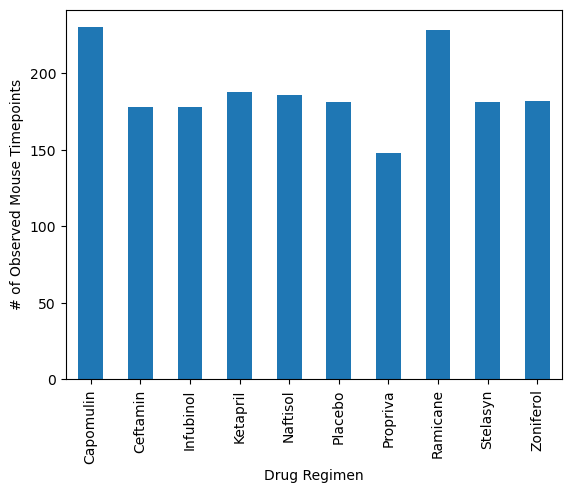

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panda_plot = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
panda_plot.plot.bar()


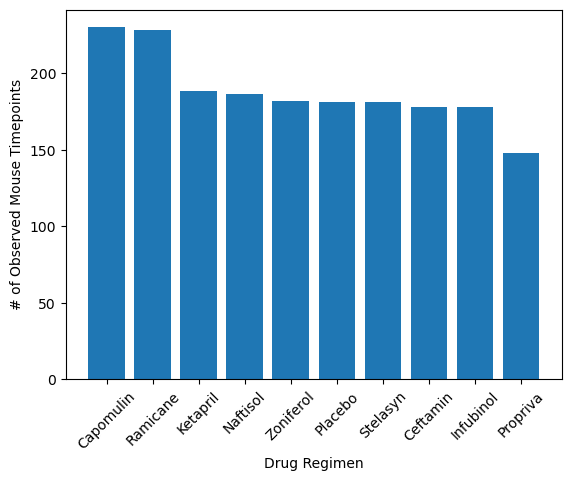

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_chart = panda_plot.sort_values(ascending=False)
plt.bar(pyplot_chart.index, pyplot_chart.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sex'>

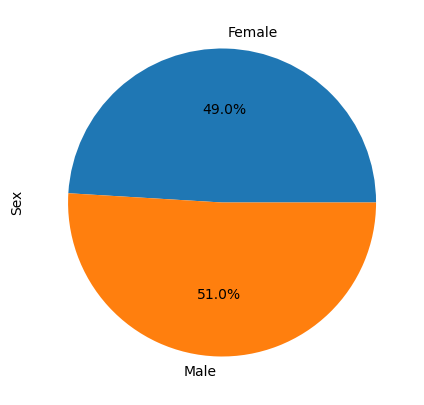

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = clean_df.groupby(['Sex'])['Sex'].count()
gender_pie.plot.pie(autopct='%1.1f%%', figsize=(5, 5))

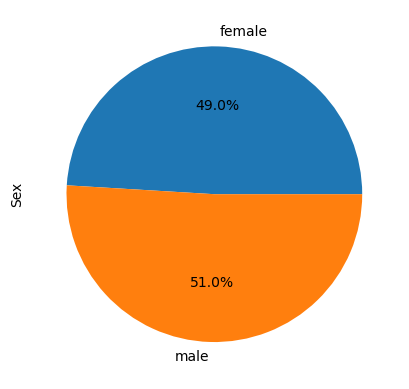

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_pie, labels=('female', 'male'), autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor_df = pd.DataFrame(final_tumor)
final_tumor_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_time_tumor = pd.merge(final_tumor, clean_df, how="left", on=["Mouse ID", "Timepoint"])
final_time_tumor


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#only doing these 4 treatments to match the box plot provided.

# Create empty list to fill with tumor vol data (for plotting)
reg_capo = []
reg_rami = []
reg_infu = []
reg_ceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatment = final_time_tumor["Tumor Volume (mm3)"]
quartiles = treatment.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The interquartile range of tumor volume is: {iqr}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_time_tumor.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        reg_capo.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        reg_rami.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        reg_infu.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        reg_ceft.append(row['Tumor Volume (mm3)'])
    
    # add subset 

  # """ What is it wanting a subset of?? """
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume is: 19.177757257500012
Values below 17.10923096124998 could be outliers.
Values above 93.82025999125003 could be outliers.


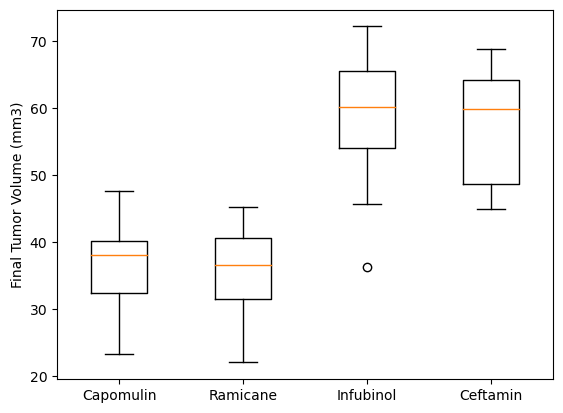

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_chart = [reg_capo,reg_rami,reg_infu,reg_ceft]
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(boxplot_chart, labels=treatments, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

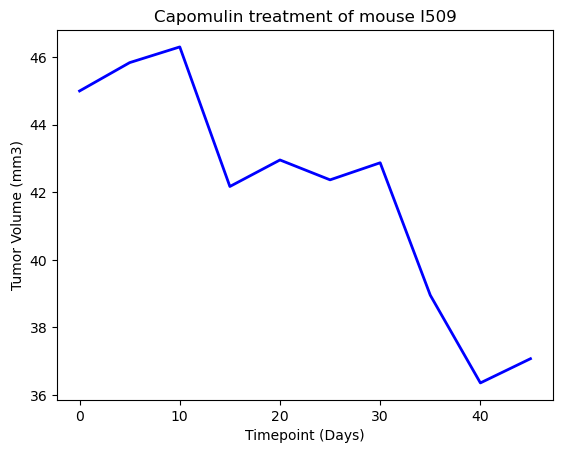

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
lineplot_df = capo_df.loc[clean_df["Mouse ID"] == "g288",:]
x_axis = lineplot_df["Timepoint"]
tumor_size = lineplot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatment of mouse I509")
plt.plot(x_axis, tumor_size,linewidth=2,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

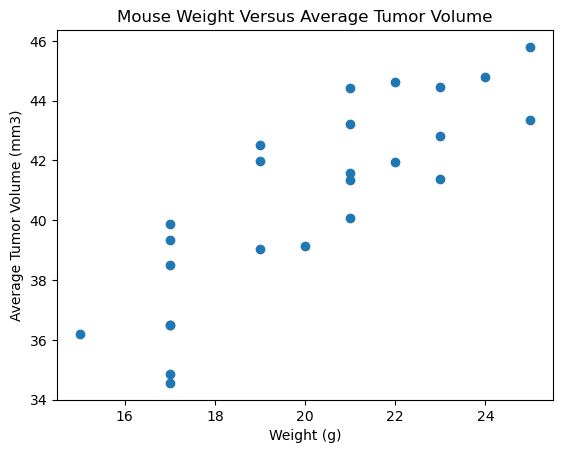

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_avg = capo_df.groupby(["Mouse ID"]).mean(numeric_only=True)

fig1, ax1 = plt.subplots()
plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
marker_size=10

## Correlation and Regression

The r-squared is: 0.7088568047708723


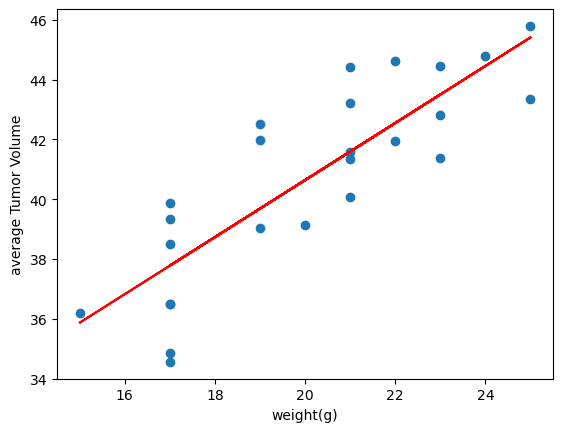

In [61]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capo_avg["Weight (g)"]
y_values = capo_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("weight(g)")
plt.ylabel("average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()